## Real Estate - Price Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as mtlb
import numpy as np

In [2]:
housing = pd.read_csv("E:/Local Disk/datasets/housing.csv" )

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null int64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


In [5]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
housing['RAD'].value_counts() 

24    132
5     115
4     110
3      38
6      26
8      24
2      24
1      20
7      17
Name: RAD, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D8F14BA828>,
      dtype=object)

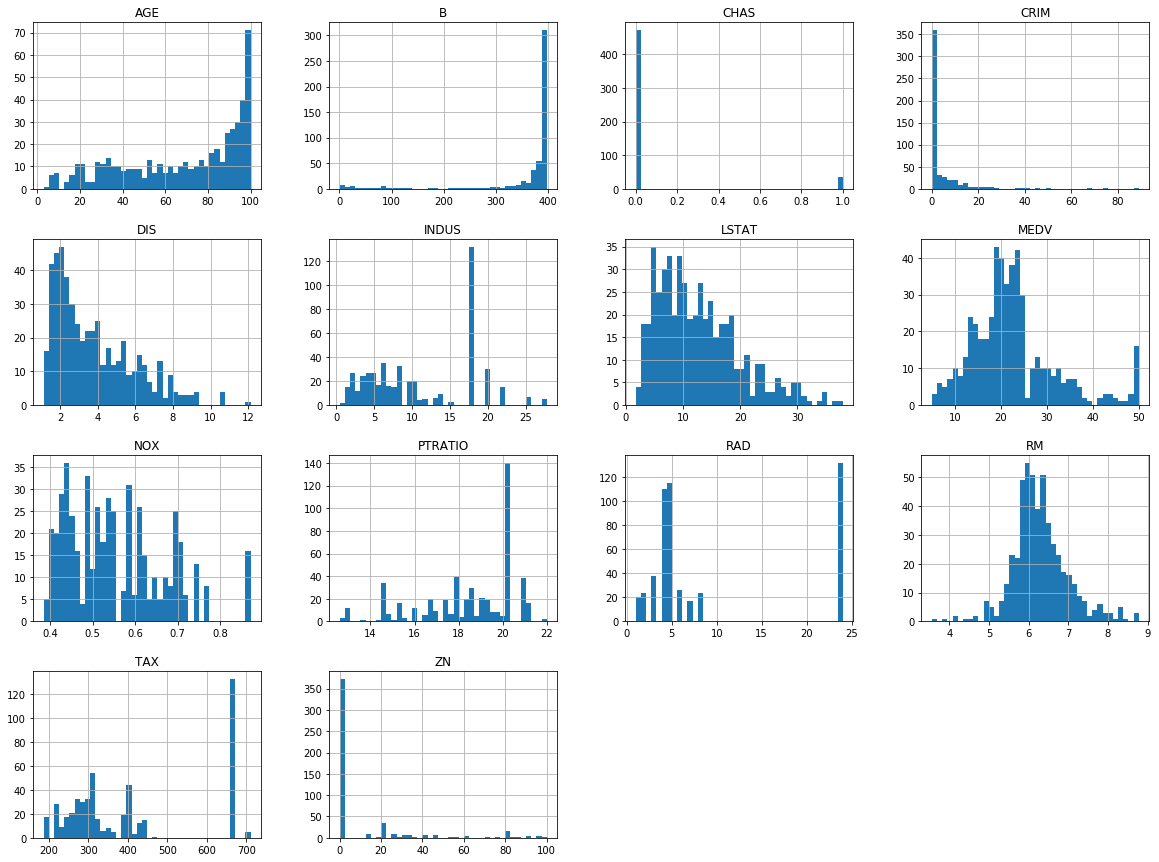

In [7]:
# for histogram
import matplotlib.pyplot as plt
%matplotlib inline
housing.hist(bins=40, figsize=(20,15))

## Train Test Splitting

In [8]:
train_set = housing.head(405)
test_set = housing.tail(101)
print(f"Values in Train_set:{len(train_set)}\nValues in Test_set: {len(test_set)} ")

Values in Train_set:405
Values in Test_set: 101 


In [9]:
from sklearn.model_selection import train_test_split

train_set , test_set = train_test_split(housing, test_size=0.2, random_state=42)
print(f"Values in Train_set:{len(train_set)}\nValues in Test_set: {len(test_set)} ")

Values in Train_set:404
Values in Test_set: 102 


In [10]:
train_set['CHAS'].value_counts()

0    375
1     29
Name: CHAS, dtype: int64

In [11]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(housing,housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
    
    


In [12]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [13]:
strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [14]:
housing = strat_train_set.copy()

## Looking for correlation

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D8F637A908>,
      dtype=object)

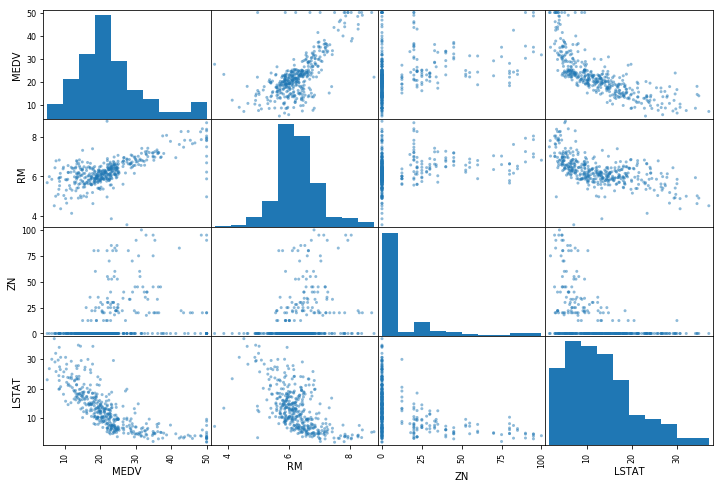

In [15]:
from pandas.plotting  import scatter_matrix

attributes = ['MEDV','RM','ZN','LSTAT']

scatter_matrix(housing[attributes], figsize=(12,8))

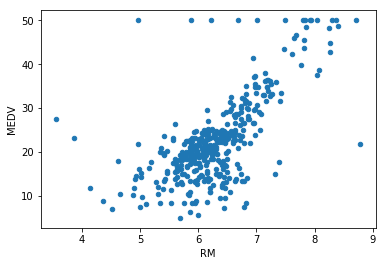

In [16]:
housing.plot(kind="scatter", x="RM", y="MEDV")

# #Attribute Combination

In [17]:
housing["TAXRM"] =housing["TAX"] /housing["RM"]

In [18]:
housing.head()
housing.shape

(404, 15)

In [19]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.679894
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
TAXRM     -0.525160
LSTAT     -0.740494
Name: MEDV, dtype: float64

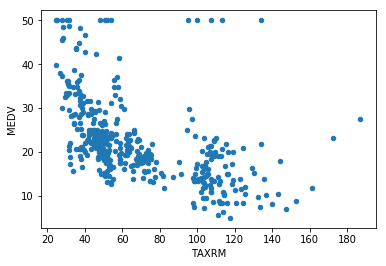

In [20]:
housing.plot(kind="scatter", x="TAXRM", y="MEDV")

In [21]:
housing = strat_train_set.drop("MEDV", axis=1)
housing_labels = strat_train_set["MEDV"].copy()
housing.shape

(404, 13)

In [22]:
# To Take care of missing attribute you have three options:
# 1.Get rid of missing data point
# 2.Get rid of the whole attribute
# 3.Set the value to some value(0, mean or median)
        

In [23]:
a = housing.dropna(subset=["RM"]) #option 1
a.shape

(404, 13)

In [24]:
housing.drop("RM", axis=1).shape #option 2
# Note that there is no RM column

(404, 12)

In [25]:
median = housing["RM"].median()
median

6.21

In [26]:
housing["RM"].fillna(median) #option 3

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
411    6.657
250    6.487
100    6.727
429    6.380
57     6.816
413    5.155
115    5.928
490    5.093
199    6.975
494    5.926
142    5.403
113    6.092
468    5.926
400    5.987
247    6.226
151    5.404
408    5.617
68     5.594
365    3.561
81     6.619
93     6.211
456    5.976
116    6.176
27     6.047
234    6.726
       ...  
433    6.436
430    6.348
479    6.229
438    5.935
38     5.966
18     5.456
97     8.069
266    7.014
133    5.822
449    6.417
477    5.304
171    5.880
180    7.765
158    6.066
279    6.812
109    6.229
82     6.302
386    4.652
418    5.957
126    5.613
446    6.341
101    6.781
277    6.826
405    5.683
367    3.863
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [27]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median')

imputer.fit(housing)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [28]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.21000e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [29]:
X = imputer.transform(housing)

In [30]:
housing_tr = pd.DataFrame(X, columns=housing.columns)
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.279908,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712983,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086963,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.210000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


## Feature Scaling

Two types of feature scalling methods

1. minmax scalling (Normalization)
    (value - min)/(max - min)
    
2. standardization
    (value -mean)/std

## Scikit-learn Design 

Primarily , Three types of objects
1. Estimators - Its estimates some parameter base on a datasets. eg. Imputer 
2. Transformers - transform method take input and return output based on the learnings from fit transform
3. Predictors

## Creating  a Pipeline

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = "median")),
    ('std_scaler', StandardScaler()),
])


In [32]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [33]:
housing_num_tr.shape

(404, 13)

## Selecting a Desired model For dragon Real Estates

In [34]:
housing_num_tr.shape

(404, 13)

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

model.fit(housing_num_tr, housing_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [36]:
housing_labels.shape

(404,)

In [37]:
some_data = housing.iloc[:5]

In [38]:
some_labels = housing.iloc[:5]


In [39]:
prepared_data = my_pipeline.transform(some_data)

In [40]:
model.predict(prepared_data)

array([22.246, 25.702, 16.598, 23.42 , 23.548])

In [41]:
some_labels

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15


## Evaluating the model

In [45]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
rmse = np.sqrt(lin_mse)

In [46]:
rmse

1.2308743209846424

## Using better evaluation technique - Cross Validiation 

In [47]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score( model, housing_num_tr, housing_labels ,scoring="neg_mean_squared_error" , cv=10)
rmse_scores = np.sqrt(-scores)
scores

array([ -7.88965685,  -7.56444449, -19.08942468,  -6.2913529 ,
       -11.55322713,  -6.69029835, -24.67942562, -11.51495487,
       -10.64845238, -10.49588597])

In [48]:
rmse_scores

array([2.8088533 , 2.75035352, 4.36914462, 2.50825695, 3.39900384,
       2.58656111, 4.96783913, 3.39336925, 3.26319665, 3.23973548])

In [49]:
def print_scores(scores):
    print("Scores: ",scores)
    print("Mean: ",scores.mean())
    print("Standard deviation: ", scores.std())

In [50]:
print(print_scores(rmse_scores))

Scores:  [2.8088533  2.75035352 4.36914462 2.50825695 3.39900384 2.58656111
 4.96783913 3.39336925 3.26319665 3.23973548]
Mean:  3.3286313839665973
Standard deviation:  0.7496168587055263
None
